# Exploration — database/classes.csv

Ce notebook explore la table **classes**: nombre de tracks uniques par (caméra, classe).

Fichier: `database/classes.csv`

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path('../database/classes.csv')
assert DATA_PATH.exists(), f'File not found: {DATA_PATH.resolve()}'

df = pd.read_csv(DATA_PATH)
df.shape, df.columns.tolist()

((42, 4), ['run_id', 'video_id', 'class_name', 'unique_tracks'])

In [3]:
display(df.head(20))

for c in ['unique_tracks']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

display(df.describe(include='all').T)

,run_id,video_id,class_name,unique_tracks
0,20260112_211653,CAMERA_DEBUT_COULOIR_DROIT,backpack,2
1,20260112_211653,CAMERA_DEBUT_COULOIR_DROIT,handbag,14
2,20260112_211653,CAMERA_DEBUT_COULOIR_DROIT,person,141
3,20260112_211653,CAMERA_DEBUT_COULOIR_DROIT,suitcase,2
4,20260112_211653,CAMERA_DEVANTURE_PORTE_ENTREE,backpack,5
5,20260112_211653,CAMERA_DEVANTURE_PORTE_ENTREE,bicycle,70
6,20260112_211653,CAMERA_DEVANTURE_PORTE_ENTREE,car,191
7,20260112_211653,CAMERA_DEVANTURE_PORTE_ENTREE,handbag,8
8,20260112_211653,CAMERA_DEVANTURE_PORTE_ENTREE,motorcycle,85
9,20260112_211653,CAMERA_DEVANTURE_PORTE_ENTREE,person,174


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
run_id,42,1,20260112_211653,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_id,42,11,CAMERA_DEVANTURE_PORTE_ENTREE,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class_name,42,8,person,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique_tracks,42.0,NaN,NaN,NaN,40.5,59.277458,1.0,2.25,7.5,60.0,191.0


,class_name,unique_tracks
5,person,1157
2,car,199
3,handbag,130
4,motorcycle,85
1,bicycle,70
0,backpack,43
6,suitcase,12
7,truck,5


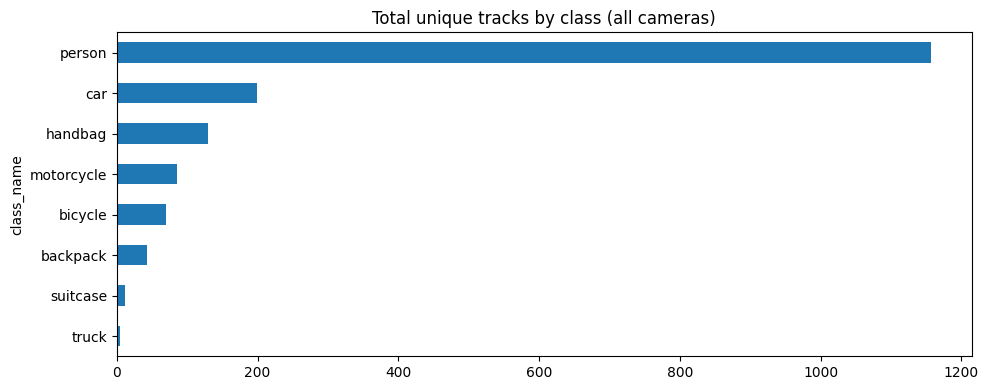

In [4]:
# Top classes overall
if {'class_name','unique_tracks'}.issubset(df.columns):
    top_classes = df.groupby('class_name', as_index=False)['unique_tracks'].sum().sort_values('unique_tracks', ascending=False)
    display(top_classes)

    plt.figure(figsize=(10, 4))
    top_classes.head(15).iloc[::-1].set_index('class_name')['unique_tracks'].plot(kind='barh')
    plt.title('Total unique tracks by class (all cameras)')
    plt.tight_layout()
    plt.show()

class_name,backpack,bicycle,car,handbag,motorcycle,person,suitcase,truck
video_id,,,,,,,,
CAMERA_DEBUT_COULOIR_DROIT,2,0,0,14,0,141,2,0
CAMERA_DEVANTURE_PORTE_ENTREE,5,70,191,8,85,174,1,5
CAMERA_DEVANTURE_SOUS_ARBRE,0,0,6,0,0,75,0,0
CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE,1,0,0,3,0,68,0,0
CAMERA_FIN_COULOIR_DROIT,5,0,0,27,0,170,1,0
CAMERA_FIN_COULOIR_GAUCHE_ETAGE1,0,0,0,3,0,18,2,0
CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,0,0,0,1,0,21,0,0
CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2,2,0,0,4,0,36,0,0
CAMERA_HALL_PORTE_DROITE,15,0,2,31,0,158,1,0


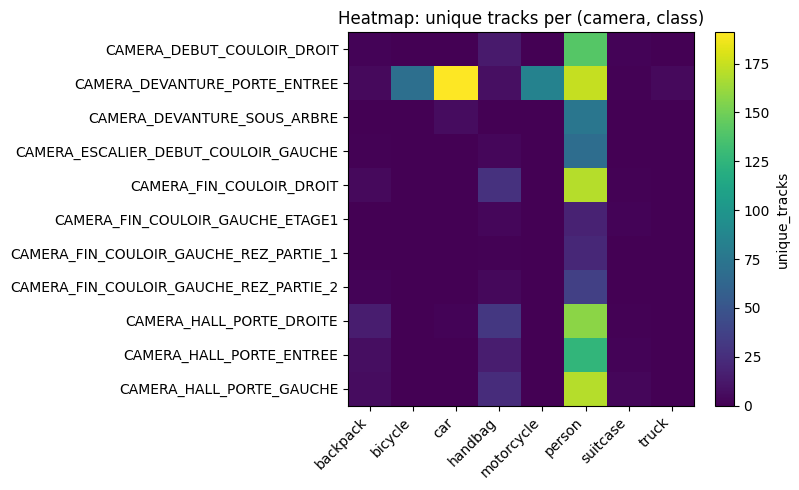

In [5]:
# Pivot table video_id x class_name
if {'video_id','class_name','unique_tracks'}.issubset(df.columns):
    pivot = df.pivot_table(index='video_id', columns='class_name', values='unique_tracks', aggfunc='sum', fill_value=0)
    display(pivot)

    # Heatmap-like plot (matplotlib imshow)
    plt.figure(figsize=(max(8, 0.6*len(pivot.columns)), max(5, 0.4*len(pivot.index))))
    plt.imshow(pivot.values, aspect='auto')
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right')
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.colorbar(label='unique_tracks')
    plt.title('Heatmap: unique tracks per (camera, class)')
    plt.tight_layout()
    plt.show()